In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from individual_file import processor

In [3]:
comp = pd.DataFrame()
for number in range(2010,2020):
    comp[str(number)] = processor("acs/{}_full.csv".format(number)).Delta
#comp.insert(0, "Label", processor("acs/2017_full.csv").Label)
comp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Label,,,,,,,,,,
White alone,6.923398,7.185899,7.423936,7.620138,7.960572,8.245187,8.372992,8.623459,8.637067,8.682231
Black or African American alone,-1.492582,-1.511352,-1.509923,-1.486772,-1.444502,-1.439964,-1.414725,-1.421584,-1.375303,-1.377853
American Indian and Alaska Native alone,0.758135,0.751089,0.749423,0.754454,0.761133,0.725298,0.755228,0.755644,0.766487,0.755690
Asian alone,-1.050243,-1.075642,-1.122470,-1.179047,-1.245835,-1.310496,-1.269798,-1.291841,-1.260097,-1.225192
Hispanic or Latino (of any race),-5.635275,-5.866519,-6.037151,-6.205799,-6.490631,-6.737103,-6.895091,-7.139223,-7.242535,-7.313978
15 to 19 years,-0.048563,-0.058193,-0.040529,-0.048612,-0.012465,0.006789,-0.015014,-0.011847,0.004125,-0.012990
20 to 24 years,0.055245,0.051503,0.037046,0.083897,0.059556,0.057871,0.046182,0.049160,0.015572,0.029959
25 to 34 years,-0.096438,-0.074461,-0.082353,-0.097073,-0.101459,-0.134958,-0.164374,-0.183284,-0.197254,-0.198885
35 to 44 years,-0.339439,-0.338166,-0.339527,-0.322080,-0.304992,-0.291928,-0.267625,-0.256470,-0.232827,-0.200780


In [43]:
def plot(demographic, title):
    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background
    g = sns.lineplot(data=demographic.T, dashes = False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + title, size=24)
    g.set(xlabel='Year', ylabel='Electoral Votes Difference')
    return g

In [44]:
race = comp.loc["White alone":"Asian alone"].append(comp.loc["Hispanic or Latino (of any race)"])
gender = comp.loc["Male":"Female"]
age = comp.loc["15 to 19 years": "75 to 84 years"]

<AxesSubplot:title={'center':'Electoral College Votes Disparity by Race'}, xlabel='Year', ylabel='Electoral Votes Difference'>

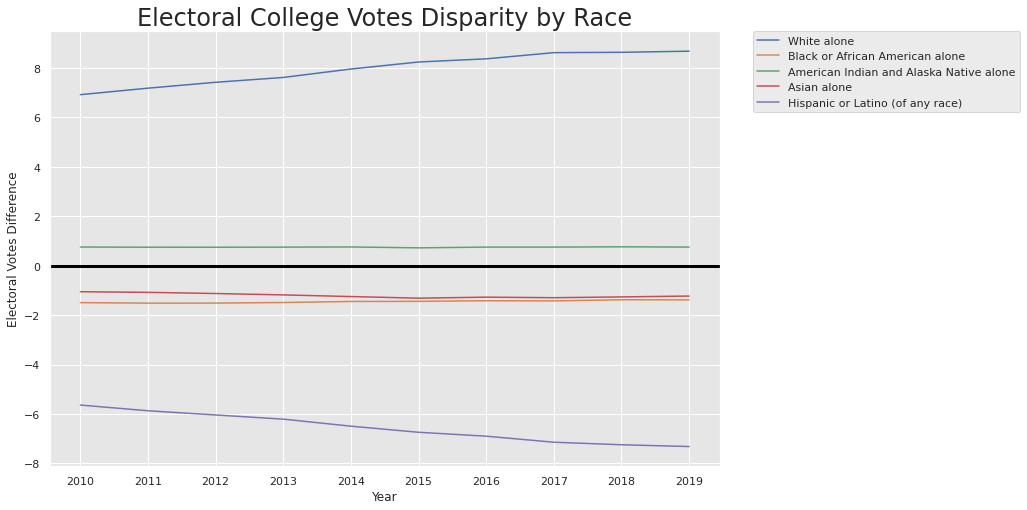

In [45]:
plot(race, "Race")

<AxesSubplot:title={'center':'Electoral College Votes Disparity by Gender'}, xlabel='Year', ylabel='Electoral Votes Difference'>

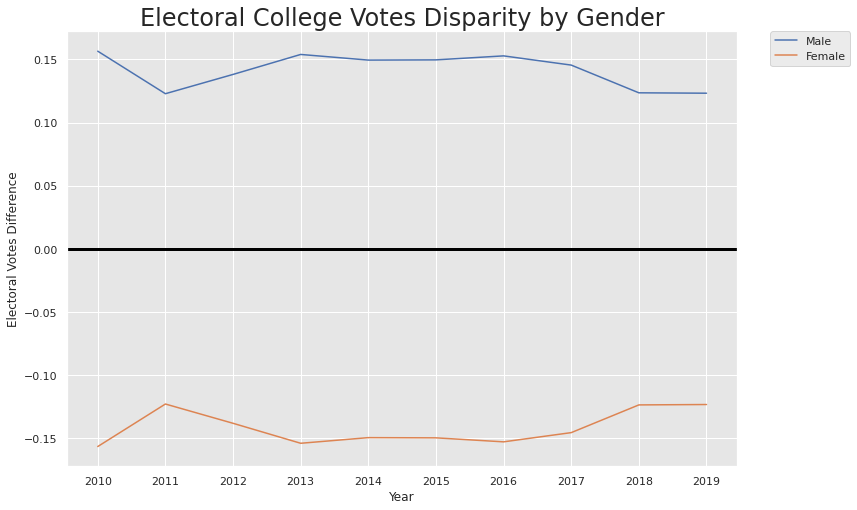

In [46]:
plot(gender, "Gender")

<AxesSubplot:title={'center':'Electoral College Votes Disparity by Age'}, xlabel='Year', ylabel='Electoral Votes Difference'>

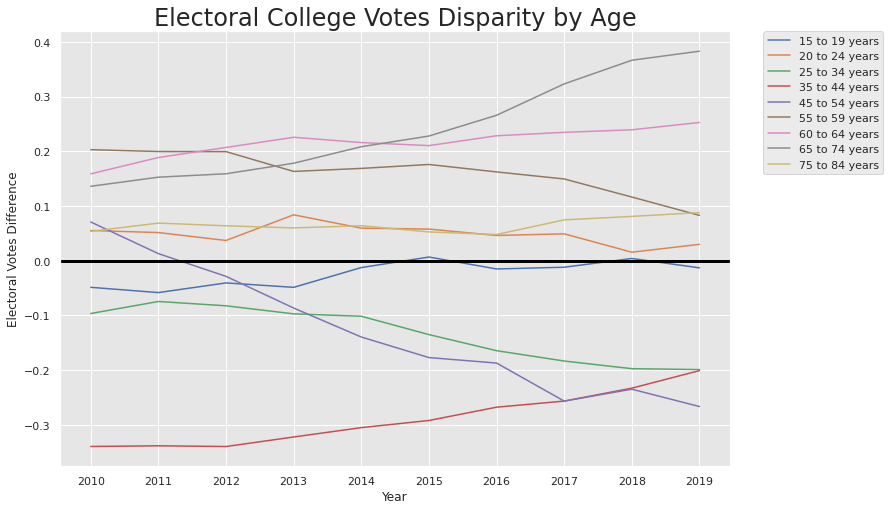

In [47]:
plot(age, "Age")

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Electoral Votes Difference')]

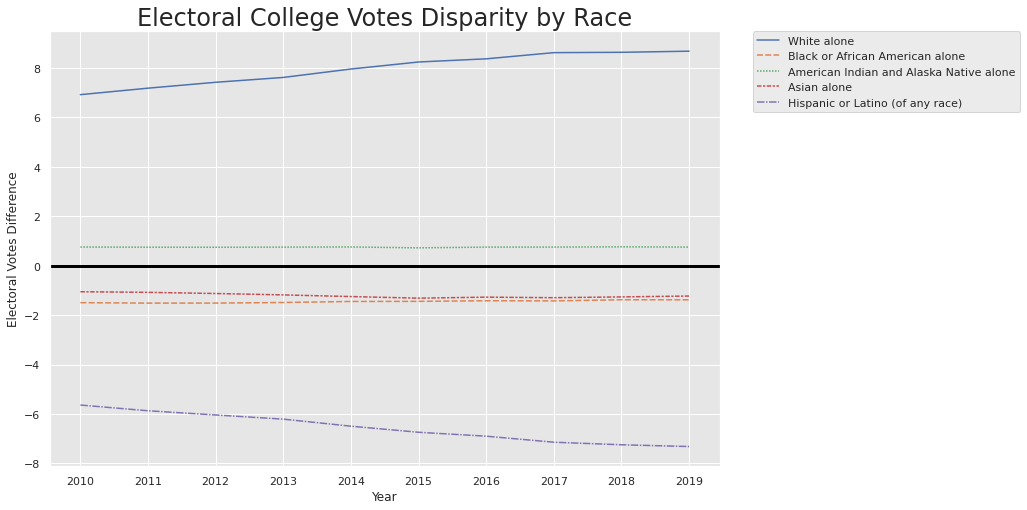

In [21]:
sns.set(rc={'figure.figsize':(12,8)})

# sns.set(style="whitegrid") #White background 
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background
g = sns.lineplot(data=race.T)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#axis line at y=0
g.axhline(0, color = 'black', linewidth = 3)

#labels + title
g.set_title("Electoral College Votes Disparity by Race", size=24)
g.set(xlabel='Year', ylabel='Electoral Votes Difference')

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Label,,,,,,,,,,
White alone,6.923398,7.185899,7.423936,7.620138,7.960572,8.245187,8.372992,8.623459,8.637067,8.682231
Black or African American alone,-1.492582,-1.511352,-1.509923,-1.486772,-1.444502,-1.439964,-1.414725,-1.421584,-1.375303,-1.377853
American Indian and Alaska Native alone,0.758135,0.751089,0.749423,0.754454,0.761133,0.725298,0.755228,0.755644,0.766487,0.755690
Asian alone,-1.050243,-1.075642,-1.122470,-1.179047,-1.245835,-1.310496,-1.269798,-1.291841,-1.260097,-1.225192
Hispanic or Latino (of any race),-5.635275,-5.866519,-6.037151,-6.205799,-6.490631,-6.737103,-6.895091,-7.139223,-7.242535,-7.313978


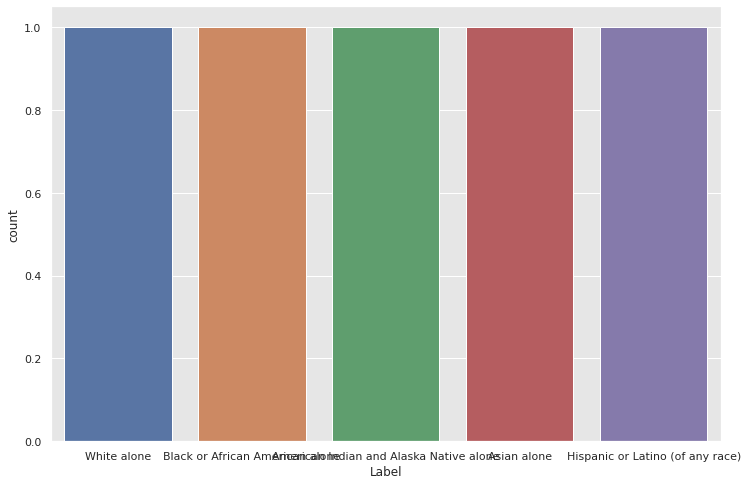

In [57]:
sns.countplot(data = race, x = race.index)
race

In [4]:
sex = comp[1: 3]
sex

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Male,0.156466,0.12281,0.138071,0.153884,0.149419,0.149592,0.152752,0.14546,0.123519,0.123209
2,Female,-0.156466,-0.12281,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.14546,-0.123519,-0.123209


In [5]:
sex = sex.T
sex.columns = sex.iloc[0]
sex

Label,Male,Female
Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519


In [6]:
temp = sex.drop(index="Label")
temp

Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519
2019,0.123209,-0.123209


TypeError: Must pass values for either `x` or `y`

In [12]:
cleaned = pd.DataFrame(
{
    "Year": [*range(10)],
    "Males": temp.iloc[:, 0],
    "Females": temp.iloc[:, 1]
}
)
cleaned

,Year,Males,Females
0,0,0.156466,-0.156466
1,1,0.12281,-0.12281
2,2,0.138071,-0.138071
3,3,0.153884,-0.153884
4,4,0.149419,-0.149419
5,5,0.149592,-0.149592
6,6,0.152752,-0.152752
7,7,0.14546,-0.14546
8,8,0.123519,-0.123519
9,9,0.123209,-0.123209


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

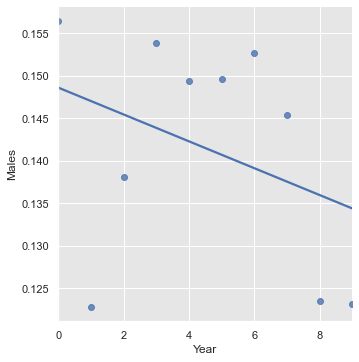

In [16]:
sns.lmplot(x ="Year", y ="Males", data = cleaned, ci = None) 

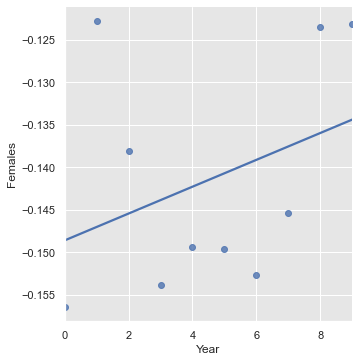

In [17]:
sns.lmplot(x ="Year", y ="Females", data = cleaned, ci = None) 

In [22]:
X = np.array(cleaned.Year).reshape(-1,1)
mal = np.array(cleaned.Males).reshape(-1,1)
fem = np.array(cleaned.Females).reshape(-1,1)

In [37]:
X_train, X_test, male_train, male_test = train_test_split(X, mal, test_size = 0.30)
X_train, X_test, female_train, female_test = train_test_split(X, fem, test_size = 0.30)
female_test

array([[-0.149592029392295],
       [-0.12351947352146908],
       [-0.15388398957384197]], dtype=object)

In [38]:
men = LinearRegression()
women = LinearRegression()

In [39]:
men.fit(X_train, male_train) 
women.fit(X_train, female_train)

LinearRegression()

In [40]:
print(men.score(X_test, male_test)) 
print(women.score(X_test, female_test)) 


-1.9627538844929355
0.19644537654907623


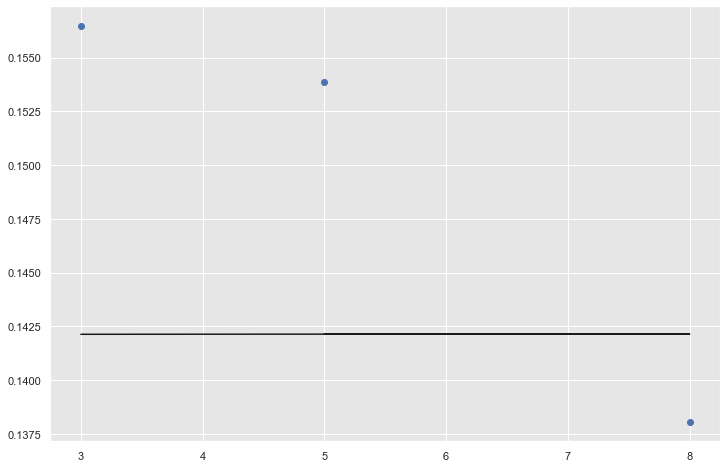

In [41]:
y_pred = men.predict(male_test) 
plt.scatter(X_test, male_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 
# Data scatter of predicted values

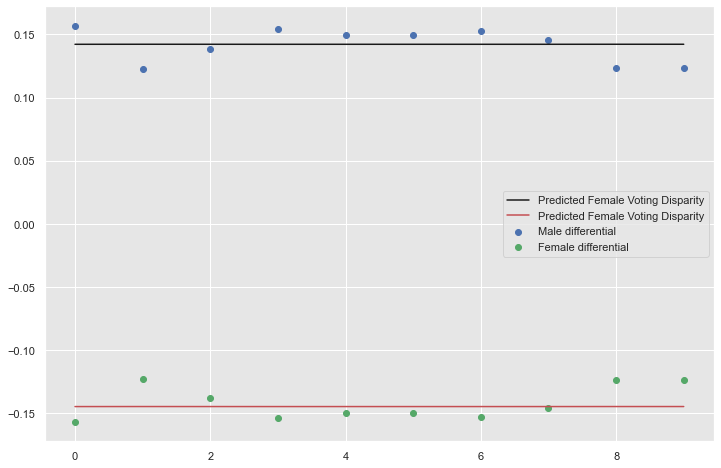

In [51]:
#plotting male and female side by side

#males
plt.scatter(x, mal, color ='b', label = "Male differential") 
plt.plot(x, men.predict(mal), color ='k', label = "Predicted Female Voting Disparity") 

#females
plt.scatter(x, fem, color ='g', label = "Female differential") 
plt.plot(x, women.predict(fem), color ='r', label = "Predicted Female Voting Disparity") 

plt.legend()
plt.show() 
# Data scatter of predicted values